# Holt-Winters — Model Testing

The Holt-Winters algorithm is a time-series forecasting method that uses exponential smoothing to make predictions based on past observations. The method considers three components of a time series: level, trend, and seasonality, and uses them to make forecasts for future periods.

## Setting libraries and dataframes

### Importing libraries

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

### Importing datasets and creating dataframe

In [2]:
data_hist = pd.read_csv("generated_data/historic_hi.csv")
data_rec = pd.read_csv("generated_data/recent_hi.csv")
data_lat = pd.read_csv("generated_data/latest_hi.csv")

In [3]:
### appends the two dataframes and creates a master dataframe
master = pd.concat([data_hist, data_rec, data_lat], ignore_index = True)

### filters for Miami-Dade county data
dade_daily_avg = master[master["COUNTY"] == "Miami-Dade"].reset_index(drop = True)
dade_daily_avg = dade_daily_avg.sort_values(by = "DATE", ascending = True).reset_index(drop = True)

### displays dataframe
dade_daily_avg

,COUNTY,LONG,LAT,ELEV,DATE,RAINFALL,TMIN,TMEAN,TMAX,TDMEAN,VPDMIN,VPDMAX,MONTH_YEAR,YEAR,MONTH_YEAR_STR,YEAR_STR,TMIN_INDEX,TMAX_INDEX,TMEAN_INDEX,REL_HUMIDITY
0,Miami-Dade,-80.5684,25.6148,7.0,1983-01-01,0.00,69.4,76.2,82.9,69.6,0.67,13.31,1983-01,1983,1983-01,1983,69.6,91.1,76.7,80.1
1,Miami-Dade,-80.5684,25.6148,7.0,1983-01-02,0.00,68.8,74.3,79.8,68.5,1.22,10.48,1983-01,1983,1983-01,1983,69.0,84.1,74.8,82.2
2,Miami-Dade,-80.5684,25.6148,7.0,1983-01-03,0.00,68.3,74.5,80.8,69.4,0.40,10.88,1983-01,1983,1983-01,1983,68.5,86.8,75.1,84.2
3,Miami-Dade,-80.5684,25.6148,7.0,1983-01-04,0.00,61.7,73.6,85.4,64.7,0.61,17.91,1983-01,1983,1983-01,1983,61.4,95.2,73.9,73.8
4,Miami-Dade,-80.5684,25.6148,7.0,1983-01-05,0.06,62.5,71.2,79.8,64.1,1.03,13.33,1983-01,1983,1983-01,1983,62.3,83.6,71.5,78.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14770,Miami-Dade,-80.5684,25.6148,7.0,2023-06-10,0.06,71.6,80.8,89.9,75.1,0.03,19.61,2023-06,2023,2023-06,2023,72.0,115.3,86.5,82.9
14771,Miami-Dade,-80.5684,25.6148,7.0,2023-06-11,0.51,73.7,82.4,91.0,75.0,0.27,22.37,2023-06,2023,2023-06,2023,74.1,115.7,89.3,78.4
14772,Miami-Dade,-80.5684,25.6148,7.0,2023-06-12,0.39,74.6,81.4,88.2,76.2,0.18,15.25,2023-06,2023,2023-06,2023,75.2,109.9,88.3,84.3
14773,Miami-Dade,-80.5684,25.6148,7.0,2023-06-13,0.53,74.5,81.1,87.6,76.3,0.23,13.53,2023-06,2023,2023-06,2023,75.1,108.4,87.8,85.4


## Modeling

### Finalizing dataframe for modeling

In [4]:
### creates new dataframe with just dates and mean temperatures
data = dade_daily_avg[["DATE", "TMEAN"]] 
data.columns = ["Date", "Temperature"]

data

,Date,Temperature
0,1983-01-01,76.2
1,1983-01-02,74.3
2,1983-01-03,74.5
3,1983-01-04,73.6
4,1983-01-05,71.2
...,...,...
14770,2023-06-10,80.8
14771,2023-06-11,82.4
14772,2023-06-12,81.4
14773,2023-06-13,81.1


### Importing model

In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Setting testing and training data

In [6]:
temperature_data = data['Temperature'].values

In [7]:
### uses all data except the last 365 days for training
train_data = temperature_data[:-840]
test_data = temperature_data[-840:]

### Implementing model with various parameters

In [8]:
model = ExponentialSmoothing(temperature_data, 
                             seasonal = "mul" , 
                             seasonal_periods = 365)
model_fit = model.fit()

model_fit.summary()

Dep. Variable:,endog,No. Observations:,14775
Model:,ExponentialSmoothing,SSE,152911.030
Optimized:,True,AIC,35261.988
Trend:,None,BIC,38051.442
Seasonal:,Multiplicative,AICC,35280.944
Seasonal Periods:,365,Date:,"Sat, 11 May 2024"
Box-Cox:,False,Time:,14:43:59
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9474613,alpha,True
smoothing_seasonal,0.0524729,gamma,True


In [9]:
y_pred_train = model_fit.predict(start = 0, end = len(train_data) - 1)
y_pred_test = model_fit.predict(start = len(train_data), end = len(temperature_data) - 1)

rmse_train = mean_squared_error(train_data, y_pred_train, squared = False)
rmse_test = mean_squared_error(test_data, y_pred_test, squared = False)

print("RMSE (Train):", rmse_train)
print("RMSE (Test):", rmse_test)

RMSE (Train): 3.2362022473321312
RMSE (Test): 2.880497992615738


In [10]:
model = ExponentialSmoothing(temperature_data, 
                             seasonal = 'add', 
                             seasonal_periods = 365)
model_fit = model.fit()

model_fit.summary()

/Users/shirshodasgupta/Documents/Python/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,endog,No. Observations:,14775
Model:,ExponentialSmoothing,SSE,144559.908
Optimized:,True,AIC,34432.191
Trend:,None,BIC,37221.645
Seasonal:,Additive,AICC,34451.147
Seasonal Periods:,365,Date:,"Sat, 11 May 2024"
Box-Cox:,False,Time:,14:44:06
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9962481,alpha,True
smoothing_seasonal,0.0001594,gamma,True


In [11]:
y_pred_train = model_fit.predict(start = 0, end = len(train_data) - 1)
y_pred_test = model_fit.predict(start = len(train_data), end = len(temperature_data) - 1)

rmse_train = mean_squared_error(train_data, y_pred_train, squared = False)
rmse_test = mean_squared_error(test_data, y_pred_test, squared = False)

print("RMSE (Train):", rmse_train)
print("RMSE (Test):", rmse_test)

RMSE (Train): 3.148483360751841
RMSE (Test): 2.7652143350927445


In [12]:
model = ExponentialSmoothing(temperature_data, 
                             seasonal = "add", 
                             seasonal_periods = 365)
model_fit = model.fit()

/Users/shirshodasgupta/Documents/Python/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Testing data

In [13]:
forecast_horizon = 365
future_dates = pd.date_range(start = data["Date"].iloc[-1], periods = forecast_horizon + 1, closed = "right")
### excludes the last date from the testing and training data
future_dates = future_dates[1:]  
y_pred_forecast = model_fit.predict(start = len(temperature_data), end = len(temperature_data) + forecast_horizon - 1)

/var/folders/8_/vf0g3np57bdb6_x59hshmtcr0000gn/T/ipykernel_11581/1741777665.py:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start = data["Date"].iloc[-1], periods = forecast_horizon + 1, closed = "right")


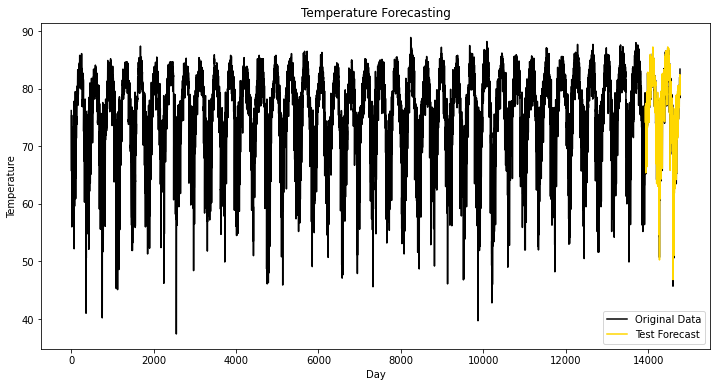

In [14]:
plt.figure(figsize = (12, 6))
plt.plot(data["Temperature"], label = "Original Data", color = "black")
plt.plot(range(len(train_data), len(temperature_data)), y_pred_test, label = "Test Forecast", color = "gold")
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.title("Temperature Forecasting")
plt.legend()
plt.show()

### Making forecasts

In [15]:
### predicts the temperature 3650 days after the last date in the dataset
future_dates = pd.date_range(start=data['Date'].iloc[-1], periods=3650, closed='right')
future_temperatures = model_fit.predict(start=len(temperature_data), end=len(temperature_data) + len(future_dates) - 1)

results = pd.DataFrame({'Date': future_dates, 'Temperature': future_temperatures})

/var/folders/8_/vf0g3np57bdb6_x59hshmtcr0000gn/T/ipykernel_11581/2506893890.py:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=data['Date'].iloc[-1], periods=3650, closed='right')


### Plotting results

In [16]:
results["Date"] = pd.to_datetime(results["Date"])
data["Date"] = pd.to_datetime(data["Date"])

/var/folders/8_/vf0g3np57bdb6_x59hshmtcr0000gn/T/ipykernel_11581/3754128484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"] = pd.to_datetime(data["Date"])


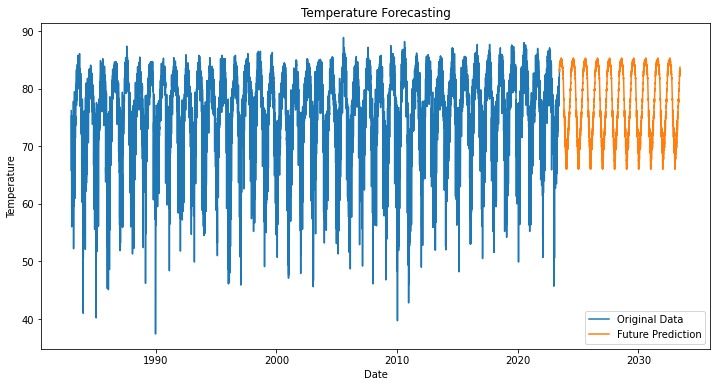

In [17]:
### plots results
plt.figure(figsize = (12, 6))
plt.plot(data["Date"], temperature_data, label = "Original Data")
plt.plot(results["Date"], results["Temperature"], label = "Future Prediction")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Forecasting")
plt.legend()
plt.show()